# In Depth: Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

A
straight-line fit is a model of the form `y = ax + b` where a is commonly known as the
slope, and b is commonly known as the intercept.

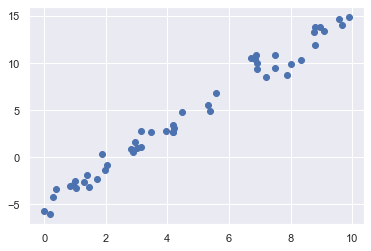

In [2]:
# slope = 2 and intercept = -5
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression(fit_intercept=True)

In [5]:
model.fit(x[:, np.newaxis], y)

LinearRegression()

In [6]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

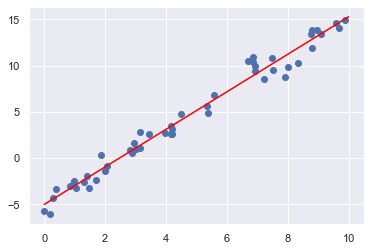

In [7]:
plt.scatter(x, y)
plt.plot(xfit, yfit, 'red')

In [8]:
print(model.coef_)

[2.02720881]


In [9]:
print(model.intercept_)

-4.9985770855532


### Polynomial basis functions

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [12]:
from sklearn.pipeline import make_pipeline

In [13]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [14]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

In [15]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

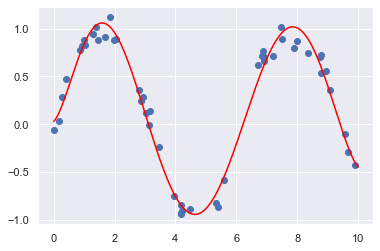

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit, 'red')

### Ridge regression (L2 regularization)

This proceeds by penal‐
izing the sum of squares (2-norms) of the model coefficients; in this case, the penalty
on the model fit would be:


$$
    P = \alpha \sum_{n=1}^N \omega_n^2
$$

where α is a free parameter that controls the strength of the penalty. This type of
penalized model is built into Scikit-Learn with the Ridge estimator

In [18]:
from sklearn.linear_model import Ridge

### Lasso regularization (L1)

Another very common type of regularization is known as lasso, and involves penaliz‐
ing the sum of absolute values (1-norms) of regression coefficients:

$$
    P = \alpha \sum_{n=1}^N|\omega_n|
$$

Though this is conceptually very similar to ridge regression, the results can differ sur‐
prisingly: for example, due to geometric reasons lasso regression tends to favor sparse
models where possible; that is, it preferentially sets model coefficients to exactly zero.